In [2]:
#Importing libraries
# Suppressing warnings and importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Ensure inline plotting if running in environments like Kaggle
%matplotlib inline

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

In [18]:
#Load and show dataset
def load_dataset(file_path='D:\OperaDownloads\spotify_top_1000_tracks.csv'):
    #Load dataset into a dataframe
    songs_df = pd.read_csv(file_path)

    return songs_df

#load dataset
df = load_dataset()

#show dataset head
df.head()

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433


In [20]:
#Data cleaning
#Convert "release_date" to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Check for any missing values in key columns
missing_values = df[['release_date', 'release_year']].isnull().sum()
print('Missing values in date related columns:\n', missing_values)

Missing values in date related columns:
 release_date    23
release_year    23
dtype: int64


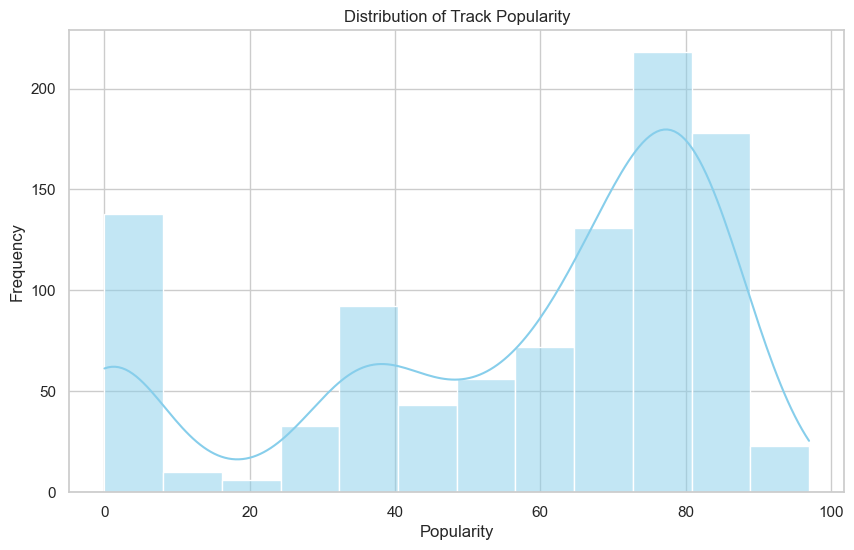

In [22]:
# Histogram for track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

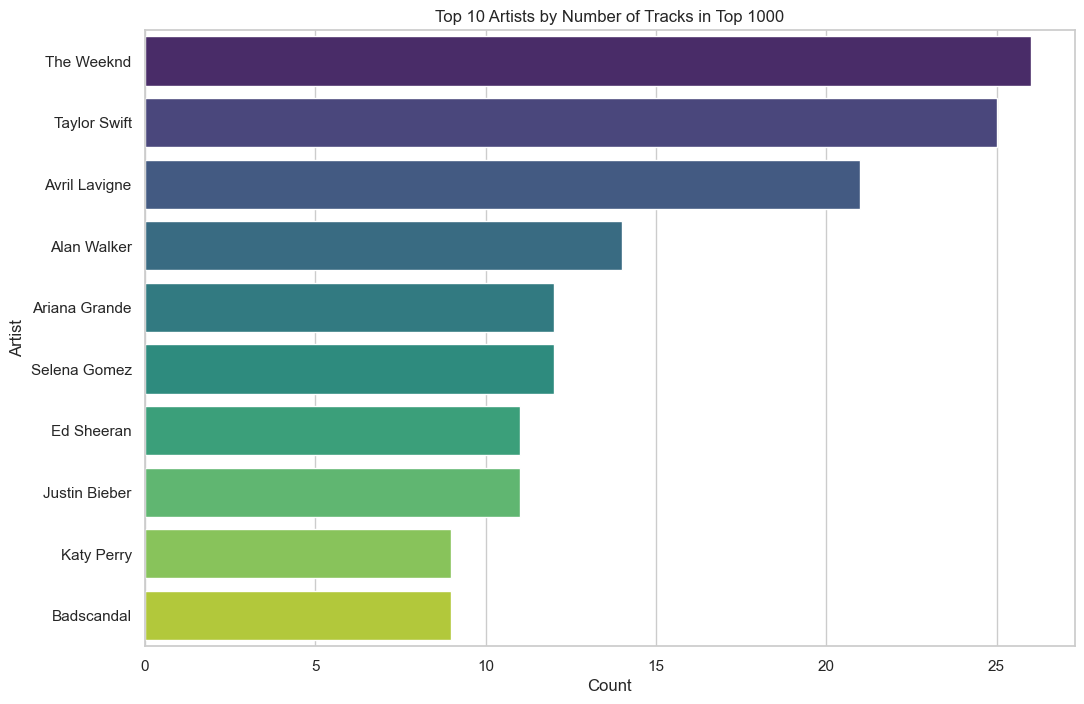

In [24]:
#Top 10 artist
plt.figure(figsize=(12, 8))
# Determine the top 10 artists
top_artists = df['artist'].value_counts().nlargest(10).index
sns.countplot(data=df[df['artist'].isin(top_artists)], y='artist', order=top_artists, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks in Top 1000')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

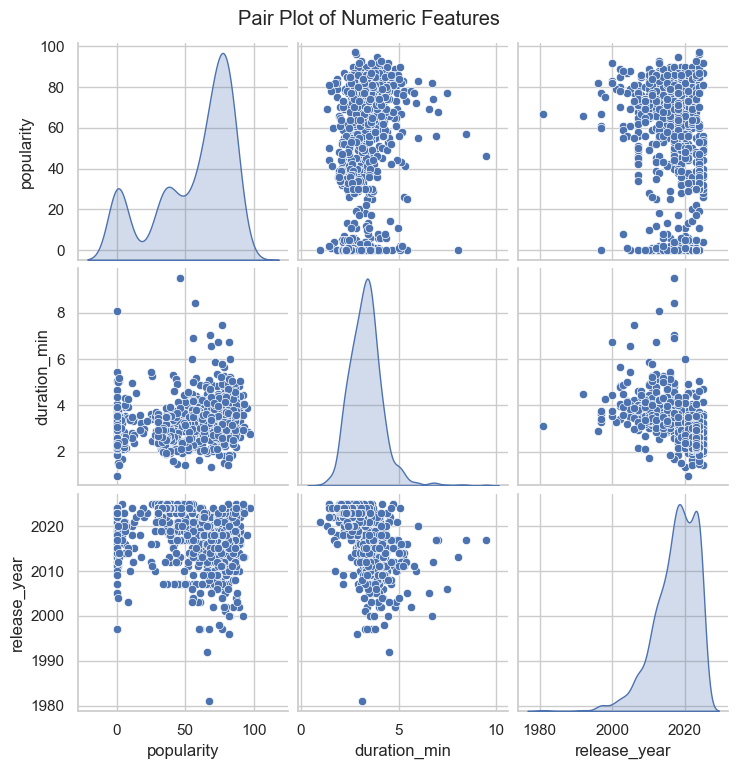

In [26]:
# Pair plot for numeric features (popularity and duration_min)
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df, diag_kind='kde', palette='cool')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()